# Correlated Graph Pairs

In [1]:
import graspologic
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packag

/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/runner/work/graspologic/graspologic/graspologic/models/edge_swaps.py:215: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  _edge_swap_numba = nb.jit(_edge_swap, nopython=False)


The correlated Graph Pairs Model means that we generate a graph pair with some correlation. We define the probability of observing the same edge in both graphs by adjusting the correlation values and sampling the graph pairs.

## ER correlation graph pair

There are different ways to define the probability matrix of the first graph. The ER model is a simple example. We assume that each edge for all pairs of vertices is sampled independently from each other edge.

ER_CORR(n, p, r) - this model specifies the number of vertices, $n$, the probability of an edge existing between a given pair of vertices, $p$, and the correlation value between the two, $r$.

Below, we sample a graph pair with the ER model (undirected and no self-loops) $G_1, G_2 \sim ER\_{CORR}\,(50, 0.5, 0.3)$.

In [2]:
from graspologic.simulations import er_corr

In [3]:
n = 50
r = 0.3
p = 0.5

np.random.seed(2)
G1, G2 = er_corr(n, p, r, directed = False, loops = False)

## Visualize the graphs using heatmap

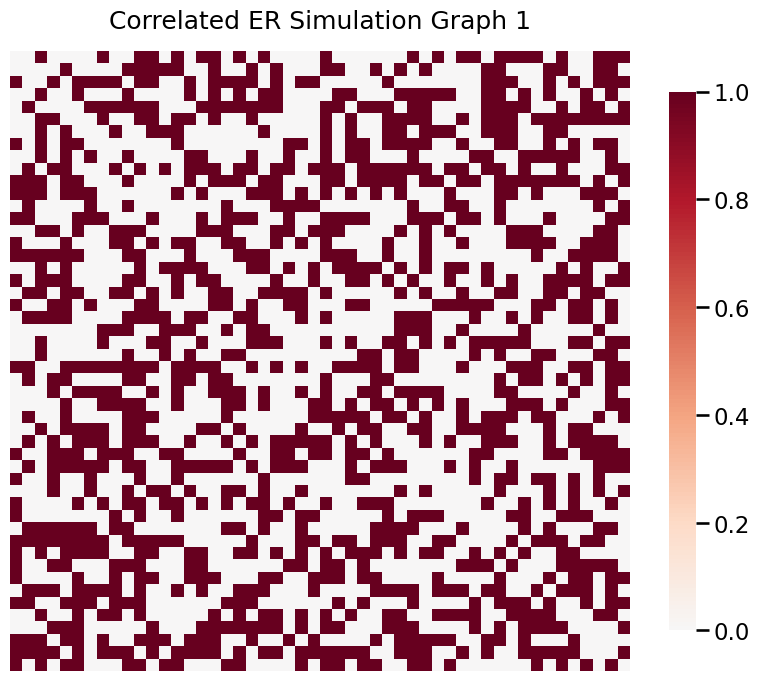

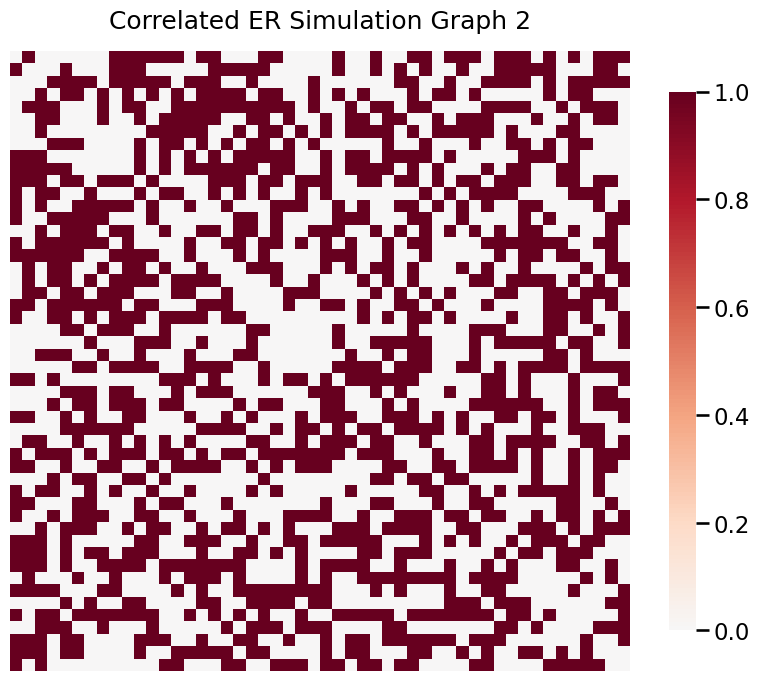

In [4]:
from graspologic.plot import heatmap
heatmap(G1, title = 'Correlated ER Simulation Graph 1')
_ = heatmap(G2, title = 'Correlated ER Simulation Graph 2')

## SBM correlated graph pair

Stochastic block models tend to produce graphs containing communities: subsets characterized by being connected with one another with particular edge densities. We can define the partitioned matrix with different probabilities of having edges and the correlation values between the two.

Below, we sample a two-block SBM graph pair (undirected and no self-loops) G1 and G2 with the following parameters:

\begin{align*}
n &= [20, 30]\\
p &= \begin{bmatrix} 
0.5 & 0.2\\
0.2 & 0.5
\end{bmatrix}\\
r &= 0.3
\end{align*}

In [5]:
from graspologic.simulations import sbm_corr

In [6]:
np.random.seed(3)
n = [20, 30]
p = [[0.5, 0.2], [0.2, 0.5]]
r = 0.3

G1, G2 = sbm_corr(n, p, r, directed=False, loops=False)

## Visualize the graphs using heatmap

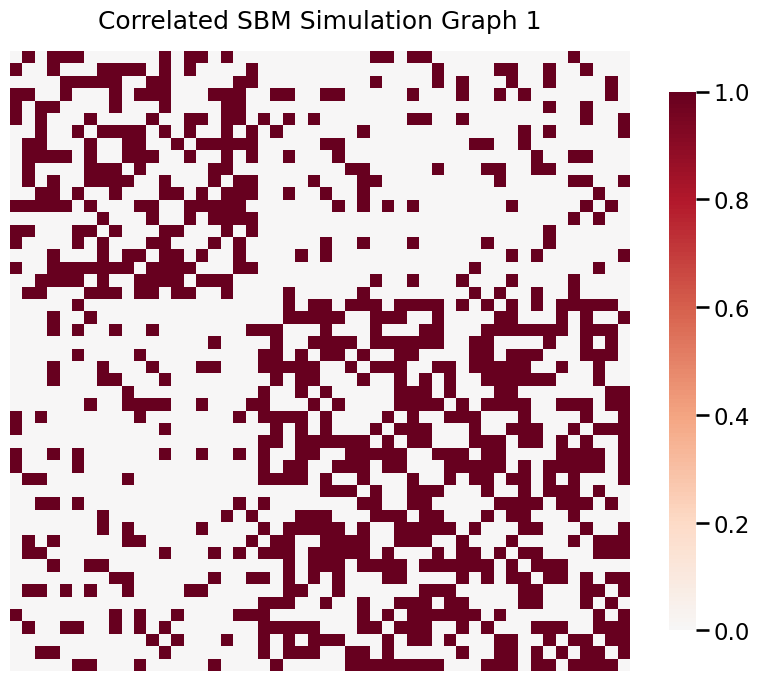

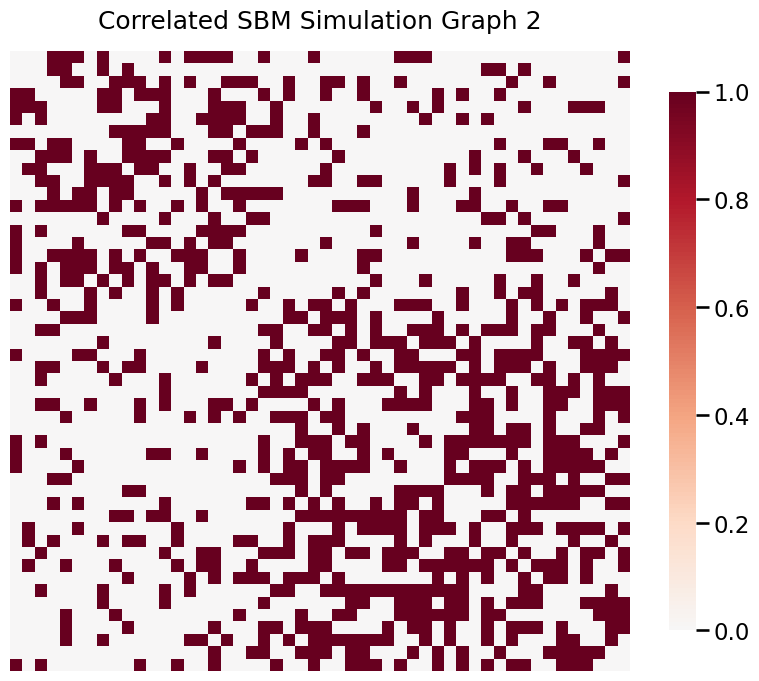

In [7]:
heatmap(G1, title = 'Correlated SBM Simulation Graph 1')
_ = heatmap(G2, title = 'Correlated SBM Simulation Graph 2')